# "Building a basic Neural Network from scratch - Kudzu"

- badges: true
- author: Anshuman Gupta

#### In this project, the idea is to write a classifier to differentiate between handwritten digits 3 and 8, from the MNIST database.

#### I will using a custom built neural network library called Kudzu.This has been developed as a part of KTF/Foundations course of Univ.ai (www.univ.ai). The source code for Kudzu Library and and this notebook can be found on my git-hub profile : www.https://github.com/anshuman6 under the folder project-solution. Any feedback and comments are welcome. Please feel free to email me at: anshuman6@gmail.com

#### 1. I will be using the MNIST database. 

#### 2. I will be comparing the results of the 4 layer NN to a standard logistic regression

##### Importing all the necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

##### The following command helps us download MNIST from notebook itself. You can skip this if you already have MNIST. You can also download it via your terminal.

In [3]:
!pip install mnist # Please note, it is commented out for now, you can remove comment if you want to install it

You should consider upgrading via the '/opt/hostedtoolcache/Python/3.6.11/x64/bin/python -m pip install --upgrade pip' command.


#### Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


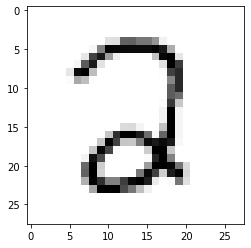

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

##### We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

##### We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

##### Importing Kudzu library and its functionality

In [15]:
from kudzu.data import Data, Dataloader, Sampler
from kudzu.callbacks import AccCallback
from kudzu.loss import MSE
from kudzu.layer import Affine, Sigmoid
from kudzu.model import Model
from kudzu.optim import GD
from kudzu.train import Learner
from kudzu.callbacks import ClfCallback
from kudzu.layer import Sigmoid
from kudzu.layer import Relu

##### We are creating a class, just so that we can use it to store our parameters for us

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

##### Initializing Data

In [17]:
data = Data(X_train, y_train.reshape(-1,1))
loss = MSE()
opt = GD(config.lr)
sampler = Sampler(data, config.bs, shuffle=True)
dl = Dataloader(data, sampler)

##### Constructing 2 different layers, one for NN and one only for logistic regression.

##### Creating containers for data to be passed, to calculate accuracies

In [18]:
training_xdata = X_train
testing_xdata = X_test
training_ydata = y_train.reshape(-1,1)
testing_ydata = y_test.reshape(-1,1)

##### Initializing models and Running training loop: 

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("final", 2, 1), Sigmoid("final")]

model_neural = Model(layers)
model_logistic = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

In [20]:
learner1 = Learner(loss, model_neural, opt, config.num_epochs)
acc1 = ClfCallback(learner1, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner1.set_callbacks([acc1])

In [21]:
learner1.train_loop(dl)

Epoch 0 Loss 0.2409709169287883
train accuracy is: 0.6944583541979636, test accuracy is 0.7056451612903226


Epoch 10 Loss 0.14064816681090583
train accuracy is: 0.884994157903522, test accuracy is 0.891633064516129


Epoch 20 Loss 0.07500499972887124
train accuracy is: 0.9223835753630446, test accuracy is 0.936491935483871


Epoch 30 Loss 0.05352328163944946
train accuracy is: 0.943748956768486, test accuracy is 0.953125


Epoch 40 Loss 0.04389732617439917
train accuracy is: 0.9514271407110666, test accuracy is 0.9606854838709677


Epoch 50 Loss 0.038616380102780894
train accuracy is: 0.956518110499082, test accuracy is 0.9657258064516129


Epoch 60 Loss 0.03526385452652444
train accuracy is: 0.9592722416958771, test accuracy is 0.9667338709677419


Epoch 70 Loss 0.03288644800457208
train accuracy is: 0.9617759973293273, test accuracy is 0.9682459677419355


Epoch 80 Loss 0.03107811929249101
train accuracy is: 0.9641128359205475, test accuracy is 0.969758064516129


Epoch 90 Loss 0.029642006723507284
train accuracy is: 0.9657820063428476, test accuracy is 0.9707661290322581


Epoch 100 Loss 0.028447591196006802
train accuracy is: 0.9673677182440327, test accuracy is 0.9707661290322581


Epoch 110 Loss 0.027438586236624884
train accuracy is: 0.9686195960607578, test accuracy is 0.9707661290322581


Epoch 120 Loss 0.02656207273203902
train accuracy is: 0.9690368886663329, test accuracy is 0.9722782258064516


Epoch 130 Loss 0.025785302677902147
train accuracy is: 0.9697045568352529, test accuracy is 0.9722782258064516


Epoch 140 Loss 0.025079958131553674
train accuracy is: 0.9705391420464029, test accuracy is 0.9727822580645161


Epoch 150 Loss 0.024440757562390183
train accuracy is: 0.9711233516942079, test accuracy is 0.9727822580645161


Epoch 160 Loss 0.023854978560570624
train accuracy is: 0.971874478384243, test accuracy is 0.9742943548387096


Epoch 170 Loss 0.023310004636191137
train accuracy is: 0.972375229510933, test accuracy is 0.9747983870967742


Epoch 180 Loss 0.022794012305648533
train accuracy is: 0.9736271073276581, test accuracy is 0.9742943548387096


Epoch 190 Loss 0.022328437086955505
train accuracy is: 0.9744616925388082, test accuracy is 0.9747983870967742


Epoch 200 Loss 0.02188137383242755
train accuracy is: 0.9749624436654982, test accuracy is 0.9747983870967742


Epoch 210 Loss 0.02145765225848675
train accuracy is: 0.9752962777499583, test accuracy is 0.9758064516129032


Epoch 220 Loss 0.021055766485727906
train accuracy is: 0.9761308629611083, test accuracy is 0.9758064516129032


Epoch 230 Loss 0.020664280614861044
train accuracy is: 0.9763812385244534, test accuracy is 0.9758064516129032


Epoch 240 Loss 0.020291353444054108
train accuracy is: 0.9770489066933734, test accuracy is 0.9763104838709677


0.0199238184105908

##### Now running only the logistic regression based classification to compare results with NN

In [22]:
learner2 = Learner(loss, model_logistic, opt, config.num_epochs)
acc2 = ClfCallback(learner2, config.bs, training_xdata , testing_xdata, training_ydata, testing_ydata)
learner2.set_callbacks([acc2])

In [23]:
learner2.train_loop(dl)

Epoch 0 Loss 0.255351341035295
train accuracy is: 0.6271907861792689, test accuracy is 0.623991935483871


Epoch 10 Loss 0.10905543879627584
train accuracy is: 0.8965114338173927, test accuracy is 0.9087701612903226


Epoch 20 Loss 0.08312497617885638
train accuracy is: 0.9201301952929394, test accuracy is 0.9339717741935484


Epoch 30 Loss 0.07120716179154873
train accuracy is: 0.9313970956434652, test accuracy is 0.9470766129032258


Epoch 40 Loss 0.06405791288490613
train accuracy is: 0.9379068602904357, test accuracy is 0.9485887096774194


Epoch 50 Loss 0.05919165908255267
train accuracy is: 0.9412452011350358, test accuracy is 0.952116935483871


Epoch 60 Loss 0.05562120151799444
train accuracy is: 0.9434985812051411, test accuracy is 0.9561491935483871


Epoch 70 Loss 0.052863598046289
train accuracy is: 0.9454181271907862, test accuracy is 0.9571572580645161


Epoch 80 Loss 0.05065507786354181
train accuracy is: 0.9470038390919713, test accuracy is 0.9581653225806451


Epoch 90 Loss 0.04883658552058483
train accuracy is: 0.9484226339509264, test accuracy is 0.9596774193548387


Epoch 100 Loss 0.04730414899328826
train accuracy is: 0.9498414288098815, test accuracy is 0.9606854838709677


Epoch 110 Loss 0.04599141372951607
train accuracy is: 0.9516775162744117, test accuracy is 0.9621975806451613


Epoch 120 Loss 0.04485040795031052
train accuracy is: 0.9528459355700217, test accuracy is 0.9621975806451613


Epoch 130 Loss 0.04384644879778517
train accuracy is: 0.9536805207811717, test accuracy is 0.9621975806451613


Epoch 140 Loss 0.042953681338055896
train accuracy is: 0.9545985645134368, test accuracy is 0.9621975806451613


Epoch 150 Loss 0.042153368057635796
train accuracy is: 0.9550993156401268, test accuracy is 0.9627016129032258


Epoch 160 Loss 0.04143048839718564
train accuracy is: 0.9563511934568519, test accuracy is 0.9637096774193549


Epoch 170 Loss 0.040772728488495426
train accuracy is: 0.956851944583542, test accuracy is 0.9642137096774194


Epoch 180 Loss 0.040171018439186974
train accuracy is: 0.957269237189117, test accuracy is 0.9647177419354839


Epoch 190 Loss 0.03961765464618413
train accuracy is: 0.957686529794692, test accuracy is 0.9652217741935484


Epoch 200 Loss 0.039107060714696495
train accuracy is: 0.9579369053580371, test accuracy is 0.9652217741935484


Epoch 210 Loss 0.03863302670233892
train accuracy is: 0.958103822400267, test accuracy is 0.9652217741935484


Epoch 220 Loss 0.03819136268202683
train accuracy is: 0.9584376564847271, test accuracy is 0.9657258064516129


Epoch 230 Loss 0.03777982504617912
train accuracy is: 0.9588549490903021, test accuracy is 0.9667338709677419


Epoch 240 Loss 0.03739346485437085
train accuracy is: 0.9592722416958771, test accuracy is 0.9667338709677419


0.01751644052340206

### Comparing results of NN and LR

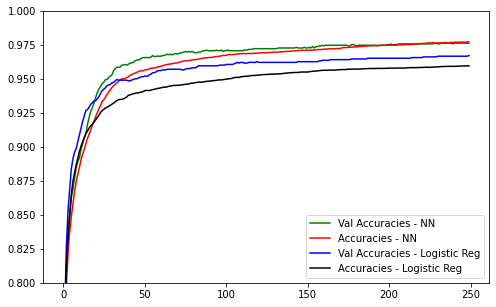

In [24]:
plt.figure(figsize=(8,5))
plt.plot(acc1.val_accuracies, 'g-', label = "Val Accuracies - NN")
plt.plot(acc1.accuracies, 'r-', label = "Accuracies - NN")
plt.plot(acc2.val_accuracies, 'b-', label = "Val Accuracies - Logistic Reg")
plt.plot(acc2.accuracies, 'k-', label = "Accuracies - Logistic Reg")
plt.ylim(0.8,1) ## for a more spread out view
plt.legend()

### Clearly NN has a better accuracy over LR; NN is overfitting - Validation accuracy (green) has dropped below training accuracy (orange), also they are diverging. This problem is not seen in LR

##### Now we will be moving through the network, till the output of the second last affine where we get a 2 dimensional output. We will be plotting this 2d output and probability contours

In [25]:
model_new = Model(layers[:-2])

In [26]:
plot_testing = model_new(testing_xdata)

##### Plotting the scatter plot of points and color coding by class

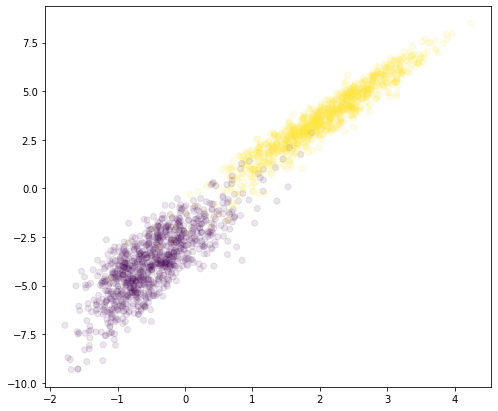

In [27]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel());

##### Plotting probability contours

In [28]:
model_prob = Model(layers[-2:]) ## picking only last two layers to get probability. That is affine followed by sigmoid

In [29]:
xgrid = np.linspace(-4, 1, 100) ## Adjust these values based on above chart, roughly -4 to 1
ygrid = np.linspace(-7.5, 7.5, 100) ## Adjust these values based on above chart, roughly -7.5, 7.5
xg, yg = np.meshgrid(xgrid, ygrid)
# xg and yg are now both 100X100, lets convert them to single arrays 

xg_interim = np.ravel(xg)
yg_interim = np.ravel(yg)

## xg_interim, yg_interim are now arrays of len 10000, now we will stack them and then transpose to get desired shape of n rows, 2 columns

X_interim = np.vstack((xg_interim, yg_interim)) ## Please note vstack takes in a tuple
X = X_interim.T

## We want a shape of n rows and 2 columns to be able to feed this to last affine
## This last affine takes only two columns, hence the above transformation
probability_contour = model_prob(X).reshape(100,100) ## to make it consistent with xg, yg

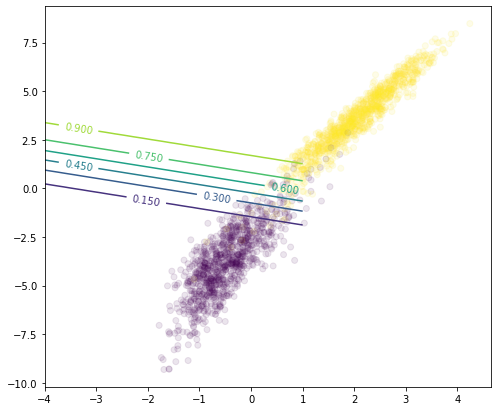

In [30]:
plt.figure(figsize=(8,7))
plt.scatter(plot_testing[:,0], plot_testing[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(xg,yg,probability_contour)
plt.clabel(contours, inline = True );